In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
from keras.src.layers import Dense, BatchNormalization, Dropout


In [2]:

df = pd.read_csv('/Users/bruunoschz/Universidad/Tercero/Redes Neuronales/propensión_de_compra/data/propensity_train.csv')

In [29]:
# Mostrar información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CODE             50000 non-null  object
 1   PRODUCTO         50000 non-null  object
 2   TIPO_CARROCERIA  50000 non-null  object
 3   COMBUSTIBLE      50000 non-null  object
 4   Potencia         50000 non-null  object
 5   TRANS            50000 non-null  object
 6   FORMA_PAGO       50000 non-null  object
 7   ESTADO_CIVIL     49221 non-null  object
 8   GENERO           49244 non-null  object
 9   OcupaciOn        50000 non-null  object
 10  PROVINCIA        50000 non-null  object
 11  Campanna1        50000 non-null  object
 12  Campanna2        50000 non-null  object
 13  Campanna3        50000 non-null  object
 14  Zona_Renta       38557 non-null  object
 15  REV_Garantia     50000 non-null  object
 16  Averia_grave     50000 non-null  object
 17  QUEJA_CAC        50000 non-null

	1.	Dimensiones: 50,000 filas y 25 columnas.
	2.	Tipos de datos:
	    18 columnas categóricas (tipo object).
	    6 columnas numéricas (int64).
	    1 columna booleana (Mas_1_coche).
	3.	Valores nulos:
	    ESTADO_CIVIL tiene 779 valores nulos.
	    GENERO tiene 756 valores nulos.
	    Zona_Renta tiene 11,443 valores nulos.

In [30]:
# Resumen estadístico de variables numéricas
print(df.describe())

         EDAD_COCHE   COSTE_VENTA        km_anno    Revisiones  Edad_Cliente  \
count  50000.000000  50000.000000   50000.000000  50000.000000  50000.000000   
mean     472.360860   2536.918340   11740.855280      3.553600     47.249460   
std      310.071905   1599.789875   10167.041268      2.540861     11.312025   
min        2.000000      0.000000       0.000000      0.000000     18.000000   
25%      192.000000   1590.000000       0.000000      1.000000     40.000000   
50%      385.000000   2352.000000   11417.000000      3.000000     48.000000   
75%      784.000000   3301.000000   17904.250000      5.000000     56.000000   
max      975.000000  18455.000000  182331.000000     13.000000     71.000000   

             Tiempo  
count  50000.000000  
mean       1.847640  
std        3.082657  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        4.000000  
max       14.000000  


In [31]:
# Resumen de variables categóricas
print(df.describe(include=['object']))

         CODE PRODUCTO TIPO_CARROCERIA COMBUSTIBLE Potencia  TRANS FORMA_PAGO  \
count   50000    50000           50000       50000    50000  50000      50000   
unique  50000       11               8           2        3      2          4   
top      CLI1        B           TIPO1      FUEL 2    Media      M    Contado   
freq        1    14441           20735       28103    34409  45775      26055   

       ESTADO_CIVIL GENERO OcupaciOn PROVINCIA Campanna1 Campanna2 Campanna3  \
count         49221  49244     50000     50000     50000     50000     50000   
unique            4      2         3        53         2         2         2   
top          CASADO      M   Empresa    Madrid        NO        NO        NO   
freq          37340  34497     45837      9429     32436     44135     43965   

       Zona_Renta REV_Garantia Averia_grave QUEJA_CAC  
count       38557        50000        50000     50000  
unique          4            2            4         2  
top          Alto      NO

    1. PRODUCTO, TIPO_CARROCERIA, COMBUSTIBLE, Potencia, FORMA_PAGO y otras variables categóricas tienen pocos valores únicos, lo que facilita su análisis.
	2. ESTADO_CIVIL, GENERO y Zona_Renta tienen valores nulos que debemos manejar.
	3. REV_Garantia tiene un valor “NO DATA”, lo que indica que puede necesitar tratamiento especial.

<Figure size 1500x1000 with 0 Axes>

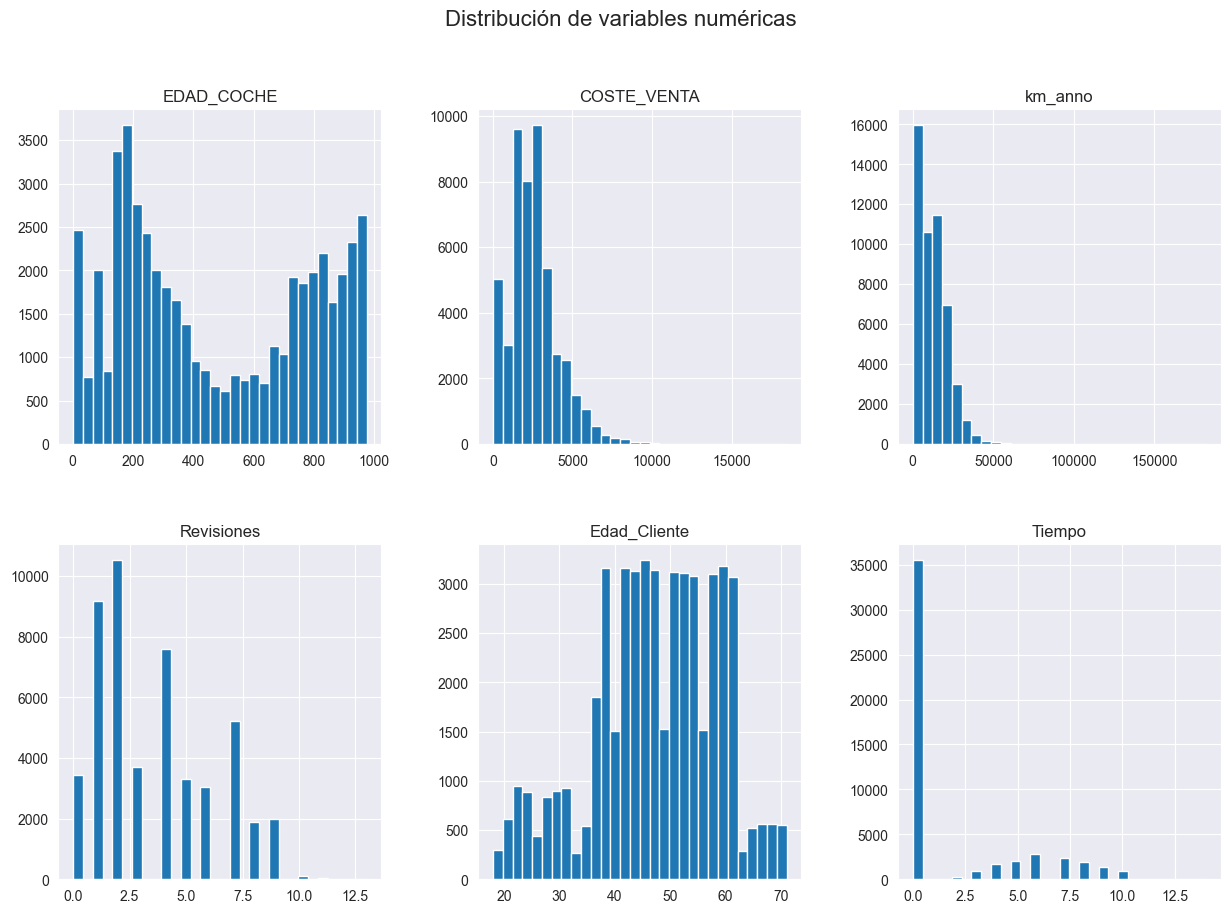

In [32]:
# Visualización de variables numéricas
plt.figure(figsize=(15, 10))
numeric_columns = ['EDAD_COCHE', 'COSTE_VENTA', 'km_anno', 'Revisiones', 'Edad_Cliente', 'Tiempo']
df[numeric_columns].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()

	EDAD_COCHE: Parece haber valores muy altos que podrían representar outliers.
	COSTE_VENTA: Distribución sesgada, con valores bajos más frecuentes.
	km_anno: Distribución con muchos valores en cero o muy bajos.
	Revisiones: Parece seguir una distribución discreta con valores más frecuentes.
	Edad_Cliente: Distribución más uniforme con algunos picos en ciertos rangos de edad.
	Tiempo: Mayor concentración en valores bajos.

/var/folders/sm/6rf4rltx2pj8k0t599_39hl80000gn/T/ipykernel_37270/228813523.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, ax=ax, palette="viridis")
/var/folders/sm/6rf4rltx2pj8k0t599_39hl80000gn/T/ipykernel_37270/228813523.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, ax=ax, palette="viridis")
/var/folders/sm/6rf4rltx2pj8k0t599_39hl80000gn/T/ipykernel_37270/228813523.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ord

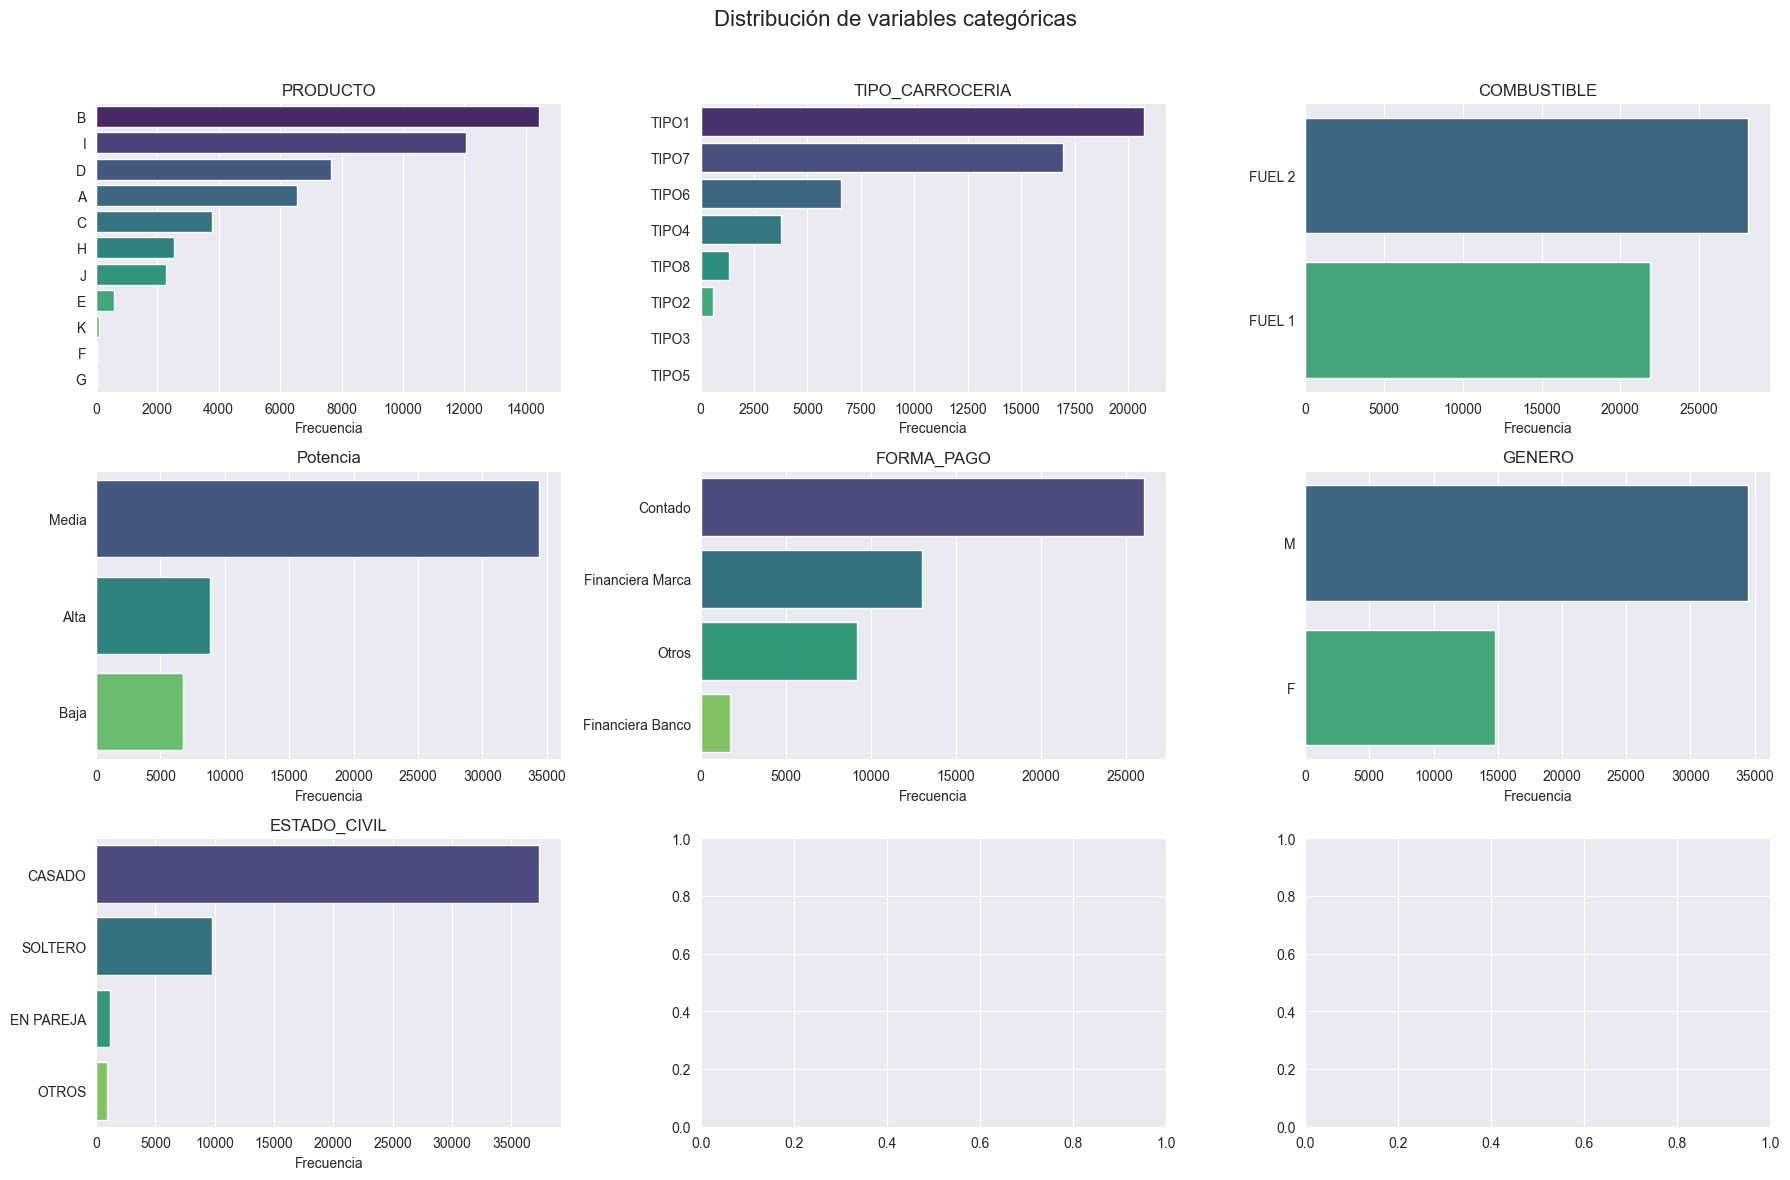

In [33]:
# Visualización de variables categóricas
categorical_columns = ['PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia', 'FORMA_PAGO', 'GENERO', 'ESTADO_CIVIL']
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle("Distribución de variables categóricas", fontsize=16)

for ax, col in zip(axes.flat, categorical_columns):
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=ax, palette="viridis")
    ax.set_title(col)
    ax.set_xlabel("Frecuencia")
    ax.set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

    PRODUCTO: La categoría más común es “B”, seguida de otras con menor frecuencia.
	TIPO_CARROCERIA: La mayoría de los registros pertenecen a “TIPO1”.
	COMBUSTIBLE: “FUEL 2” es el tipo de combustible más frecuente.
	Potencia: “Media” es la potencia más común.
	FORMA_PAGO: “Contado” es la opción más utilizada.
	GENERO: Hay más hombres que mujeres en el dataset.
	ESTADO_CIVIL: “Casado” es el estado civil más frecuente.

In [3]:
#Limpieza de datos

import pandas as pd

# Cargar el dataset
def load_and_clean_data(df):
    
    # Eliminar columnas irrelevantes
    df.drop(columns=["CODE"], inplace=True)  # ID de cliente no es útil para el modelo
    
    # Reemplazar valores faltantes en variables categóricas con la moda
    for col in ["ESTADO_CIVIL", "GENERO", "Zona_Renta"]:
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    
    # Codificación de variables categóricas (one-hot encoding)
    categorical_cols = ["PRODUCTO", "TIPO_CARROCERIA", "COMBUSTIBLE", "TRANS", "FORMA_PAGO", 
                        "ESTADO_CIVIL", "GENERO", "OcupaciOn", "PROVINCIA", "Zona_Renta", 
                        "REV_Garantia", "Averia_grave", "QUEJA_CAC"]
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    # Convertir variables booleanas a enteros
    df["Mas_1_coche"] = df["Mas_1_coche"].astype(int)
    
    return df


df = load_and_clean_data(df)

In [4]:
df

,Potencia,Campanna1,Campanna2,Campanna3,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,...,PROVINCIA_Zamora,PROVINCIA_Zaragoza,Zona_Renta_Medio,Zona_Renta_Medio-Bajo,Zona_Renta_Otros,REV_Garantia_SI,Averia_grave_Averia leve,Averia_grave_Averia muy grave,Averia_grave_No,QUEJA_CAC_SI
0,Baja,SI,NO,NO,208,2892,0,0,2,18,...,False,False,False,True,False,False,False,True,False,True
1,Baja,NO,NO,NO,245,1376,7187,0,2,53,...,False,False,False,True,False,True,False,False,True,False
2,Baja,NO,NO,NO,251,1376,0,1,4,21,...,False,False,True,False,False,False,False,False,True,False
3,Baja,SI,NO,NO,243,2015,7256,1,4,48,...,False,False,True,False,False,True,False,True,False,True
4,Baja,SI,NO,SI,23,1818,0,1,3,21,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Media,NO,NO,NO,878,1450,3057,1,7,32,...,False,False,False,False,False,False,False,False,True,False
49996,Media,NO,NO,NO,871,1450,8060,0,4,60,...,False,False,False,False,True,False,False,True,False,True
49997,Media,NO,NO,NO,876,1450,10969,1,7,57,...,False,False,False,False,False,False,False,False,True,False
49998,Media,NO,NO,NO,788,1465,7282,1,4,48,...,False,False,False,False,False,False,False,False,True,False


In [5]:
from sklearn.preprocessing import LabelEncoder

# Preprocesamiento de datos
# Codificar variables categóricas
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [6]:
from sklearn.model_selection import train_test_split

# Separar características y variable objetivo
X = df.drop(columns=['Mas_1_coche', 'Tiempo']) 
y = df['Mas_1_coche'].astype(int)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
X

,Potencia,Campanna1,Campanna2,Campanna3,EDAD_COCHE,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,PRODUCTO_B,...,PROVINCIA_Zamora,PROVINCIA_Zaragoza,Zona_Renta_Medio,Zona_Renta_Medio-Bajo,Zona_Renta_Otros,REV_Garantia_SI,Averia_grave_Averia leve,Averia_grave_Averia muy grave,Averia_grave_No,QUEJA_CAC_SI
0,1,1,0,0,208,2892,0,2,18,False,...,False,False,False,True,False,False,False,True,False,True
1,1,0,0,0,245,1376,7187,2,53,False,...,False,False,False,True,False,True,False,False,True,False
2,1,0,0,0,251,1376,0,4,21,False,...,False,False,True,False,False,False,False,False,True,False
3,1,1,0,0,243,2015,7256,4,48,False,...,False,False,True,False,False,True,False,True,False,True
4,1,1,0,1,23,1818,0,3,21,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,0,0,878,1450,3057,7,32,False,...,False,False,False,False,False,False,False,False,True,False
49996,2,0,0,0,871,1450,8060,4,60,False,...,False,False,False,False,True,False,False,True,False,True
49997,2,0,0,0,876,1450,10969,7,57,False,...,False,False,False,False,False,False,False,False,True,False
49998,2,0,0,0,788,1465,7282,4,48,False,...,False,False,False,False,False,False,False,False,True,False


In [8]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construcción de la red neuronal  (relu quita mierda)
model = Sequential([
        Dense(64, activation='relu', input_dim=X_train.shape[1]),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(16, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

In [10]:
# Compilar el modelo
model.compile(optimizer='adam', loss='MeanSquaredError', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")

Epoch 1/50
1250/1250 [==============================] - 2s 1ms/step - loss: 0.1216 - accuracy: 0.8276 - val_loss: 0.1181 - val_accuracy: 0.8287
Epoch 2/50
1250/1250 [==============================] - 1s 649us/step - loss: 0.1213 - accuracy: 0.8264 - val_loss: 0.1186 - val_accuracy: 0.8256
Epoch 3/50
1250/1250 [==============================] - 1s 653us/step - loss: 0.1220 - accuracy: 0.8247 - val_loss: 0.1176 - val_accuracy: 0.8285
Epoch 4/50
1250/1250 [==============================] - 1s 646us/step - loss: 0.1211 - accuracy: 0.8285 - val_loss: 0.1185 - val_accuracy: 0.8262
Epoch 5/50
1250/1250 [==============================] - 1s 647us/step - loss: 0.1199 - accuracy: 0.8286 - val_loss: 0.1184 - val_accuracy: 0.8270
Epoch 6/50
1250/1250 [==============================] - 1s 680us/step - loss: 0.1205 - accuracy: 0.8304 - val_loss: 0.1183 - val_accuracy: 0.8265
Epoch 7/50
1250/1250 [==============================] - 1s 687us/step - loss: 0.1210 - accuracy: 0.8275 - val_loss: 0.1186 - v

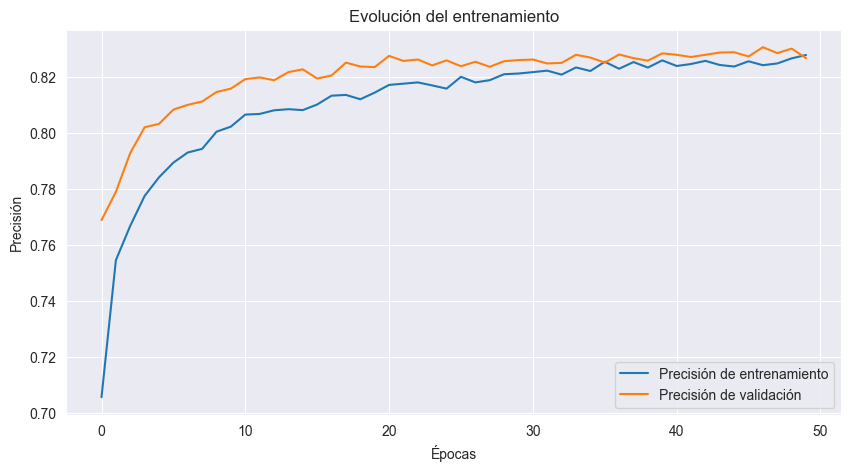

In [16]:
# Visualización de la evolución del entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Evolución del entrenamiento')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy, AUC
from itertools import product

# Supongamos que X e y ya están definidos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Revisar balance de clases
class_distribution = y_train.value_counts(normalize=True)
class_weights = {0: 1.0, 1: (len(y_train) / sum(y_train))}

# Lista de parámetros a probar
neurons = [[64, 32, 16], [32, 32, 16], [64, 64, 32], [32, 16, 16]]
activation = ['relu', 'tanh', 'sigmoid']
optimizers = [Adam, SGD, RMSprop, Adagrad]
losses = [BinaryCrossentropy()]
learning_rates = [0.01, 0.005, 0.001, 0.0005, 0.0001]
dropouts = [0.2, 0.4]
batch_sizes = [256]
epochs = [20, 50]
metrics = ['accuracy', AUC(name="auc")]

# Definir función para crear el modelo
def build_model(neurons, activation_fn, dropout_rate):
    model = Sequential()
    model.add(Dense(neurons[0], activation=activation_fn, input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(neurons[1], activation=activation_fn))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(neurons[2], activation=activation_fn))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    return model

# Grid Search
def grid_search_nn():
    results = []
    best_model = None
    best_val_accuracy = 0.0
    param_combinations = list(product(neurons, activation, optimizers, losses, learning_rates, dropouts, batch_sizes, epochs))
    
    for params in param_combinations:
        n_neurons, activation_fn, optimizer_class, loss, lr, dropout_rate, batch_size, n_epochs = params
        optimizer = optimizer_class(learning_rate=lr)  # Crear nuevo optimizador en cada iteración
        
        model = build_model(n_neurons, activation_fn, dropout_rate)
        model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
        
        history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_val, y_val), class_weight=class_weights, verbose=0)
        val_accuracy = history.history.get('val_accuracy', [0.0])[-1]  # Guardar última val_accuracy
        
        results.append((n_neurons, activation_fn, optimizer.__class__.__name__, loss.__class__.__name__, lr, dropout_rate, batch_size, n_epochs, val_accuracy))
        
        # Mostrar resultados después del entrenamiento
        print(f'Trained Model: Neurons={n_neurons}, Activation={activation_fn}, Optimizer={optimizer.__class__.__name__}, Learning Rate={lr}, Dropout={dropout_rate}, Batch Size={batch_size}, Epochs={n_epochs}, Val Accuracy={val_accuracy:.4f}')
        
        # Guardar el mejor modelo basado en val_accuracy
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model = model
    
    # Mostrar el mejor modelo al final
    print(f'Best Model - Val Accuracy: {best_val_accuracy:.4f}')
    
    return results, best_model

# Ejecutar grid search
best_results, best_model = grid_search_nn()


/Users/bruunoschz/anaconda3/envs/visionAr/lib/python3.8/site-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Trained Model: Neurons=[64, 32, 16], Activation=relu, Optimizer=Adam, Learning Rate=0.01, Dropout=0.2, Batch Size=256, Epochs=20, Val Accuracy=0.7660


Trained Model: Neurons=[64, 32, 16], Activation=relu, Optimizer=Adam, Learning Rate=0.01, Dropout=0.2, Batch Size=256, Epochs=50, Val Accuracy=0.7668


ADAM  y MeanSquaredError dan los mejores resultados

In [29]:
print(y_train.value_counts(normalize=True))

Mas_1_coche
0    0.708375
1    0.291625
Name: proportion, dtype: float64
